# **Visualizing Global Covid Forecast correlations heatmap and 3D trisurface plot and and finding the particular date that experienced the sudden rise of Covid 19 cases in India.****

/kaggle/input/covid19-global-forecasting-week-2/submission.csv
/kaggle/input/covid19-global-forecasting-week-2/test.csv
/kaggle/input/covid19-global-forecasting-week-2/train.csv


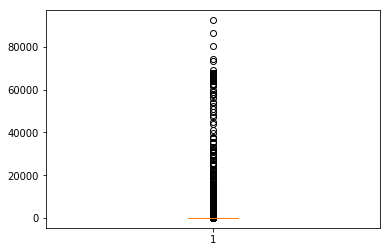

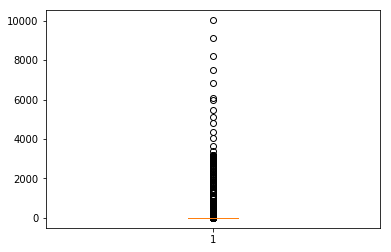

In [20]:

# Visualizing Global Covid Forecast using correlations heatmap and 3D trisurface plot and finding the particular date that experienced the sudden rise of Covid 19 cases in India. 
import numpy as np 
import pandas as pd 
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
import seaborn as sns 
import matplotlib.pyplot as plt 
from mpl_toolkits.mplot3d import Axes3D 
from matplotlib import cm
from scipy.stats import trim_mean 
import sklearn as sk 



datatest= pd.read_csv("../input/covid19-global-forecasting-week-2/test.csv") 
datatrain = pd.read_csv("../input/covid19-global-forecasting-week-2/train.csv")
datatrain.describe()


#A boxplot is a graph that gives you a good indication of how the values in the data are spread out. Although boxplots may seem primitive in comparison to a histogram or density plot, they have the advantage of 
#taking up less space, which is useful when comparing distributions between many groups or datasets.

#boxplot for fatalities Global Covid Forecast
y = list(datatrain.ConfirmedCases) 
plt.boxplot(y) 
plt.show()

#boxplot for fatalities Global Covid Forecast
y = list(datatrain.Fatalities) 
plt.boxplot(y) 
plt.show()





*Annotated Heatmaps of a Correlation Matrix. A heatmap is a graphical representation of data in which data values are represented as colors. That is, it uses color in order to communicate a value to the reader,* 

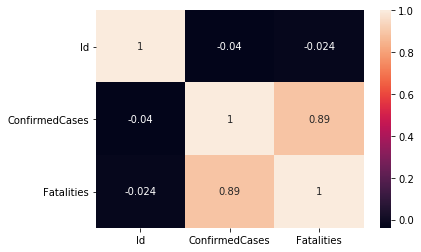

In [21]:
#Annotated Heatmaps of a Correlation Matrix. A heatmap is a graphical representation of data in which data values are represented as colors. That is, it uses color in order to communicate a value to the reader
# generating correlation heatmap 
sns.heatmap(datatrain.corr(), annot = True) 
# posting correlation heatmap to output console  
plt.show() 






You already know that if you have a data set with many columns, a good way to quickly check correlations among columns is by visualizing the correlation matrix as a heatmap.*

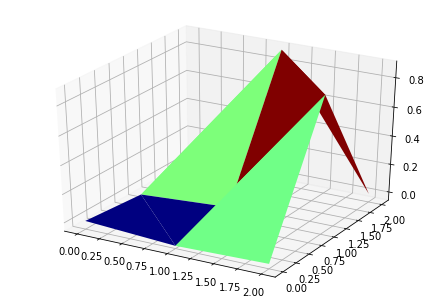

In [22]:

# Generating correlation data 
df = datatrain.corr() 
df.index = range(0, len(df)) 
df.rename(columns = dict(zip(df.columns, df.index)), inplace = True) 
df = df.astype(object) 

''' Generating coordinates with 
corresponding correlation values '''
for i in range(0, len(df)): 
	for j in range(0, len(df)): 
		if i != j: 
			df.iloc[i, j] = (i, j, df.iloc[i, j]) 
		else : 
			df.iloc[i, j] = (i, j, 0) 

df_list = [] 

# flattening dataframe values 
for sub_list in df.values: 
	df_list.extend(sub_list) 

# converting list of tuples into trivariate dataframe 
plot_df = pd.DataFrame(df_list) 

fig = plt.figure() 
ax = Axes3D(fig) 

# plotting 3D trisurface plot 
ax.plot_trisurf(plot_df[0], plot_df[1], plot_df[2], 
					cmap = cm.jet, linewidth = 0.2) 

plt.show() 





Here I have determined the specific data for India since it experienced a drastic sudden increase in covid 19 cases after 2020.03.02 as evident in the below result 

Text(0.5, 0, 'Infected Date')

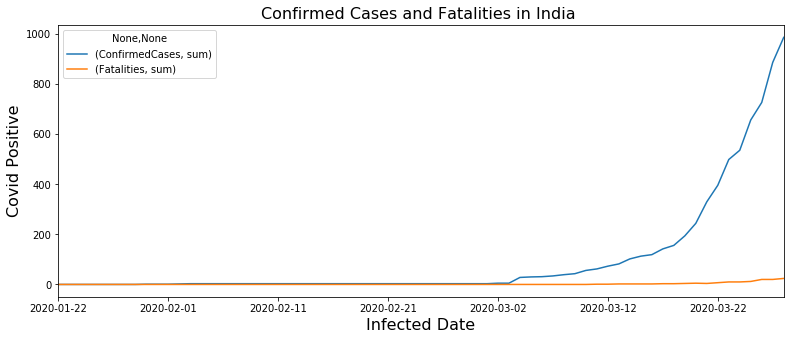

In [23]:

covid_affected_India= datatrain[datatrain['Country_Region']=='India'].groupby(['Date']).agg({'ConfirmedCases':['sum']})
covid_death_India = datatrain[datatrain['Country_Region']=='India'].groupby(['Date']).agg({'Fatalities':['sum']})
covid_in_India = covid_affected_India.join(covid_death_India)

fig, (ax1) = plt.subplots(1, figsize=(13,5))
covid_in_India.plot(ax=ax1,)
ax1.set_title("Confirmed Cases and Fatalities in India ", size=16)
ax1.set_ylabel("Covid Positive", size=16)
ax1.set_xlabel("Infected Date", size=16)



In [24]:
import plotly.graph_objects as go
import matplotlib.pyplot as plt
from tqdm import tqdm
import time
from pathlib import Path
import keras.backend as K
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
from sklearn.preprocessing import StandardScaler
import numpy as np 
import pandas as pd 
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
import seaborn as sns 
import matplotlib.pyplot as plt 
from mpl_toolkits.mplot3d import Axes3D 
from matplotlib import cm
from scipy.stats import trim_mean 
import sklearn as sk 

from random import random
from numpy import array
from numpy import cumsum
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import TimeDistributed
from keras.layers import Bidirectional

# create a sequence classification instance
def get_sequence(n_timesteps):
	# create a sequence of random numbers in [0,1]
	X = array([random() for _ in range(n_timesteps)])
	# calculate cut-off value to change class values
	limit = n_timesteps/4.0
	# determine the class outcome for each item in cumulative sequence
	y = array([0 if x < limit else 1 for x in cumsum(X)])
	# reshape input and output data to be suitable for LSTMs
	X = X.reshape(1, n_timesteps, 1)
	y = y.reshape(1, n_timesteps, 1)
	return X, y

# define problem properties
n_timesteps = 10
# define LSTM
model = Sequential()
model.add(Bidirectional(LSTM(20, return_sequences=True), input_shape=(n_timesteps, 1)))
model.add(TimeDistributed(Dense(1, activation='sigmoid')))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# train LSTM
for epoch in range(1000):
	# generate new random sequence
	X,y = get_sequence(n_timesteps)
	# fit model for one epoch on this sequence
	model.fit(X, y, epochs=1, batch_size=1, verbose=2)
# evaluate LSTM
X,y = get_sequence(n_timesteps)
yhat = model.predict_classes(X, verbose=0)
for i in range(n_timesteps):
	print('Expected:', y[0, i], 'Predicted', yhat[0, i])
    
    
datatrain = pd.read_csv('../input/covid19-global-forecasting-week-2/train.csv')
datatest = pd.read_csv('../input/covid19-global-forecasting-week-2/test.csv')
datatrain.head()
datatest.head()
datatrain.rename(columns={'Country_Region':'Country'}, inplace=True)
datatest.rename(columns={'Country_Region':'Country'}, inplace=True)

datatrain.rename(columns={'Province_State':'State'}, inplace=True)
datatest.rename(columns={'Province_State':'State'}, inplace=True)

datatrain['Date'] = pd.to_datetime(datatrain['Date'], infer_datetime_format=True)
datatest['Date'] = pd.to_datetime(datatest['Date'], infer_datetime_format=True)

datatrain.info()
datatest.info()

y1_Train = datatrain.iloc[:, -2]
y1_Train.head()
y2_Train = datatrain.iloc[:, -1]
y2_Train.head()

EMPTY_VAL = "EMPTY_VAL"

def fillState(state, country):
    if state == EMPTY_VAL: return country
    return state



#X_Train = datatrain.loc[:, ['State', 'Country', 'Date']]
X_Train = datatrain.copy()

X_Train['State'].fillna(EMPTY_VAL, inplace=True)
X_Train['State'] = X_Train.loc[:, ['State', 'Country']].apply(lambda x : fillState(x['State'], x['Country']), axis=1)

X_Train.loc[:, 'Date'] = X_Train.Date.dt.strftime("%m%d")
X_Train["Date"]  = X_Train["Date"].astype(int)

X_Train.head()

#X_Test = datatest.loc[:, ['State', 'Country', 'Date']]
X_Test = datatest.copy()

X_Test['State'].fillna(EMPTY_VAL, inplace=True)
X_Test['State'] = X_Test.loc[:, ['State', 'Country']].apply(lambda x : fillState(x['State'], x['Country']), axis=1)

X_Test.loc[:, 'Date'] = X_Test.Date.dt.strftime("%m%d")
X_Test["Date"]  = X_Test["Date"].astype(int)

X_Test.head()




from sklearn import preprocessing

le = preprocessing.LabelEncoder()

X_Train.Country = le.fit_transform(X_Train.Country)
X_Train['State'] = le.fit_transform(X_Train['State'])

X_Train.head()

X_Test.Country = le.fit_transform(X_Test.Country)
X_Test['State'] = le.fit_transform(X_Test['State'])

X_Test.head()

datatrain.head()
datatrain.loc[datatrain.Country == 'India', :]
datatest.tail()


from warnings import filterwarnings
filterwarnings('ignore')

from sklearn import preprocessing

le = preprocessing.LabelEncoder()

from xgboost import XGBRegressor

countries = X_Train.Country.unique()


file = pd.DataFrame({'ForecastId': [], 'ConfirmedCases': [], 'Fatalities': []})

for country in countries:
    states = X_Train.loc[X_Train.Country == country, :].State.unique()
    #print(country, states)
    # check whether string is nan or not
    for state in states:
        X_Train_CS = X_Train.loc[(X_Train.Country == country) & (X_Train.State == state), ['State', 'Country', 'Date', 'ConfirmedCases', 'Fatalities']]
        
        y1_Train_CS = X_Train_CS.loc[:, 'ConfirmedCases']
        y2_Train_CS = X_Train_CS.loc[:, 'Fatalities']
        
        X_Train_CS = X_Train_CS.loc[:, ['State', 'Country', 'Date']]
        
        X_Train_CS.Country = le.fit_transform(X_Train_CS.Country)
        X_Train_CS['State'] = le.fit_transform(X_Train_CS['State'])
        
        X_Test_CS = X_Test.loc[(X_Test.Country == country) & (X_Test.State == state), ['State', 'Country', 'Date', 'ForecastId']]
        
        X_Test_CS_Id = X_Test_CS.loc[:, 'ForecastId']
        X_Test_CS = X_Test_CS.loc[:, ['State', 'Country', 'Date']]
        
        X_Test_CS.Country = le.fit_transform(X_Test_CS.Country)
        X_Test_CS['State'] = le.fit_transform(X_Test_CS['State'])
        
        
        model1 = XGBRegressor(n_estimators=100)
        model1.fit(X_Train_CS, y1_Train_CS)
        y1_pred = model1.predict(X_Test_CS)
        
        model2 = XGBRegressor(n_estimators=100)
        model2.fit(X_Train_CS, y2_Train_CS)
        y2_pred = model2.predict(X_Test_CS)
        
        file_out = pd.DataFrame({'ForecastId': X_Test_CS_Id, 'ConfirmedCases': y1_pred, 'Fatalities': y2_pred})
        file = pd.concat([file, file_out], axis=0)
  

file.ForecastId = file.ForecastId.astype('int')
file.tail()
file.to_csv('submission.csv', index=False)

/kaggle/input/covid19-global-forecasting-week-2/submission.csv
/kaggle/input/covid19-global-forecasting-week-2/test.csv
/kaggle/input/covid19-global-forecasting-week-2/train.csv
Epoch 1/1
 - 1s - loss: 0.7256 - accuracy: 0.3000
Epoch 1/1
 - 0s - loss: 0.7142 - accuracy: 0.3000
Epoch 1/1
 - 0s - loss: 0.6939 - accuracy: 0.5000
Epoch 1/1
 - 0s - loss: 0.7193 - accuracy: 0.3000
Epoch 1/1
 - 0s - loss: 0.6800 - accuracy: 0.8000
Epoch 1/1
 - 0s - loss: 0.6897 - accuracy: 0.6000
Epoch 1/1
 - 0s - loss: 0.6898 - accuracy: 0.5000
Epoch 1/1
 - 0s - loss: 0.6903 - accuracy: 0.5000
Epoch 1/1
 - 0s - loss: 0.6800 - accuracy: 0.6000
Epoch 1/1
 - 0s - loss: 0.6820 - accuracy: 0.7000
Epoch 1/1
 - 0s - loss: 0.6922 - accuracy: 0.4000
Epoch 1/1
 - 0s - loss: 0.6793 - accuracy: 0.6000
Epoch 1/1
 - 0s - loss: 0.6798 - accuracy: 0.6000
Epoch 1/1
 - 0s - loss: 0.6824 - accuracy: 0.5000
Epoch 1/1
 - 0s - loss: 0.6698 - accuracy: 0.8000
Epoch 1/1
 - 0s - loss: 0.6660 - accuracy: 0.8000
Epoch 1/1
 - 0s - loss

Epoch 1/1
 - 0s - loss: 0.4946 - accuracy: 0.7000
Epoch 1/1
 - 0s - loss: 0.1324 - accuracy: 1.0000
Epoch 1/1
 - 0s - loss: 0.1704 - accuracy: 0.9000
Epoch 1/1
 - 0s - loss: 0.1250 - accuracy: 1.0000
Epoch 1/1
 - 0s - loss: 0.2568 - accuracy: 0.9000
Epoch 1/1
 - 0s - loss: 0.1194 - accuracy: 1.0000
Epoch 1/1
 - 0s - loss: 0.1182 - accuracy: 1.0000
Epoch 1/1
 - 0s - loss: 0.2439 - accuracy: 0.9000
Epoch 1/1
 - 0s - loss: 0.4878 - accuracy: 0.8000
Epoch 1/1
 - 0s - loss: 0.4890 - accuracy: 0.8000
Epoch 1/1
 - 0s - loss: 0.1521 - accuracy: 0.9000
Epoch 1/1
 - 0s - loss: 0.1186 - accuracy: 1.0000
Epoch 1/1
 - 0s - loss: 0.1379 - accuracy: 1.0000
Epoch 1/1
 - 0s - loss: 0.1346 - accuracy: 1.0000
Epoch 1/1
 - 0s - loss: 0.2788 - accuracy: 0.9000
Epoch 1/1
 - 0s - loss: 0.6033 - accuracy: 0.7000
Epoch 1/1
 - 0s - loss: 0.3538 - accuracy: 0.8000
Epoch 1/1
 - 0s - loss: 0.1335 - accuracy: 1.0000
Epoch 1/1
 - 0s - loss: 0.1166 - accuracy: 1.0000
Epoch 1/1
 - 0s - loss: 0.4368 - accuracy: 0.8000


Epoch 1/1
 - 0s - loss: 0.1066 - accuracy: 1.0000
Epoch 1/1
 - 0s - loss: 0.1493 - accuracy: 0.9000
Epoch 1/1
 - 0s - loss: 0.1908 - accuracy: 0.9000
Epoch 1/1
 - 0s - loss: 0.1005 - accuracy: 1.0000
Epoch 1/1
 - 0s - loss: 0.1070 - accuracy: 1.0000
Epoch 1/1
 - 0s - loss: 0.1222 - accuracy: 1.0000
Epoch 1/1
 - 0s - loss: 0.1023 - accuracy: 1.0000
Epoch 1/1
 - 0s - loss: 0.2335 - accuracy: 0.9000
Epoch 1/1
 - 0s - loss: 0.4462 - accuracy: 0.8000
Epoch 1/1
 - 0s - loss: 0.1997 - accuracy: 0.9000
Epoch 1/1
 - 0s - loss: 0.3859 - accuracy: 0.8000
Epoch 1/1
 - 0s - loss: 0.0956 - accuracy: 1.0000
Epoch 1/1
 - 0s - loss: 0.2082 - accuracy: 0.9000
Epoch 1/1
 - 0s - loss: 0.5034 - accuracy: 0.8000
Epoch 1/1
 - 0s - loss: 0.1071 - accuracy: 1.0000
Epoch 1/1
 - 0s - loss: 0.0985 - accuracy: 1.0000
Epoch 1/1
 - 0s - loss: 0.1048 - accuracy: 1.0000
Epoch 1/1
 - 0s - loss: 0.1132 - accuracy: 1.0000
Epoch 1/1
 - 0s - loss: 0.2241 - accuracy: 0.9000
Epoch 1/1
 - 0s - loss: 0.2029 - accuracy: 0.9000


Epoch 1/1
 - 0s - loss: 0.1615 - accuracy: 0.9000
Epoch 1/1
 - 0s - loss: 0.1034 - accuracy: 1.0000
Epoch 1/1
 - 0s - loss: 0.0779 - accuracy: 1.0000
Epoch 1/1
 - 0s - loss: 0.4139 - accuracy: 0.8000
Epoch 1/1
 - 0s - loss: 0.1836 - accuracy: 0.9000
Epoch 1/1
 - 0s - loss: 0.0829 - accuracy: 1.0000
Epoch 1/1
 - 0s - loss: 0.1738 - accuracy: 0.9000
Epoch 1/1
 - 0s - loss: 0.2069 - accuracy: 0.9000
Epoch 1/1
 - 0s - loss: 0.2091 - accuracy: 0.9000
Epoch 1/1
 - 0s - loss: 0.1339 - accuracy: 0.9000
Epoch 1/1
 - 0s - loss: 0.0980 - accuracy: 1.0000
Epoch 1/1
 - 0s - loss: 0.0955 - accuracy: 1.0000
Epoch 1/1
 - 0s - loss: 0.4912 - accuracy: 0.7000
Epoch 1/1
 - 0s - loss: 0.1030 - accuracy: 1.0000
Epoch 1/1
 - 0s - loss: 0.1569 - accuracy: 0.9000
Epoch 1/1
 - 0s - loss: 0.5576 - accuracy: 0.7000
Epoch 1/1
 - 0s - loss: 0.2806 - accuracy: 0.8000
Epoch 1/1
 - 0s - loss: 0.1127 - accuracy: 0.9000
Epoch 1/1
 - 0s - loss: 0.1150 - accuracy: 1.0000
Epoch 1/1
 - 0s - loss: 0.1368 - accuracy: 0.9000


Epoch 1/1
 - 0s - loss: 0.1423 - accuracy: 1.0000
Epoch 1/1
 - 0s - loss: 0.1073 - accuracy: 0.9000
Epoch 1/1
 - 0s - loss: 0.1188 - accuracy: 1.0000
Epoch 1/1
 - 0s - loss: 0.1212 - accuracy: 0.9000
Epoch 1/1
 - 0s - loss: 0.1693 - accuracy: 0.9000
Epoch 1/1
 - 0s - loss: 0.1901 - accuracy: 0.9000
Epoch 1/1
 - 0s - loss: 0.0885 - accuracy: 1.0000
Epoch 1/1
 - 0s - loss: 0.2628 - accuracy: 0.9000
Epoch 1/1
 - 0s - loss: 0.0868 - accuracy: 1.0000
Epoch 1/1
 - 0s - loss: 0.1510 - accuracy: 0.9000
Epoch 1/1
 - 0s - loss: 0.1317 - accuracy: 0.9000
Epoch 1/1
 - 0s - loss: 0.1210 - accuracy: 0.9000
Epoch 1/1
 - 0s - loss: 0.1773 - accuracy: 0.9000
Epoch 1/1
 - 0s - loss: 0.1157 - accuracy: 0.9000
Epoch 1/1
 - 0s - loss: 0.1202 - accuracy: 0.9000
Epoch 1/1
 - 0s - loss: 0.0729 - accuracy: 1.0000
Epoch 1/1
 - 0s - loss: 0.0837 - accuracy: 1.0000
Epoch 1/1
 - 0s - loss: 0.0960 - accuracy: 1.0000
Epoch 1/1
 - 0s - loss: 0.1596 - accuracy: 0.9000
Epoch 1/1
 - 0s - loss: 0.0980 - accuracy: 1.0000


Epoch 1/1
 - 0s - loss: 0.3472 - accuracy: 0.8000
Epoch 1/1
 - 0s - loss: 0.1707 - accuracy: 0.9000
Epoch 1/1
 - 0s - loss: 0.1724 - accuracy: 0.9000
Epoch 1/1
 - 0s - loss: 0.0934 - accuracy: 1.0000
Epoch 1/1
 - 0s - loss: 0.3013 - accuracy: 0.8000
Epoch 1/1
 - 0s - loss: 0.0708 - accuracy: 1.0000
Epoch 1/1
 - 0s - loss: 0.0949 - accuracy: 1.0000
Epoch 1/1
 - 0s - loss: 0.0976 - accuracy: 1.0000
Epoch 1/1
 - 0s - loss: 0.1000 - accuracy: 1.0000
Epoch 1/1
 - 0s - loss: 0.0984 - accuracy: 1.0000
Epoch 1/1
 - 0s - loss: 0.1999 - accuracy: 0.9000
Epoch 1/1
 - 0s - loss: 0.0815 - accuracy: 1.0000
Epoch 1/1
 - 0s - loss: 0.0818 - accuracy: 1.0000
Epoch 1/1
 - 0s - loss: 0.1273 - accuracy: 0.9000
Epoch 1/1
 - 0s - loss: 0.0805 - accuracy: 1.0000
Epoch 1/1
 - 0s - loss: 0.0927 - accuracy: 1.0000
Epoch 1/1
 - 0s - loss: 0.1941 - accuracy: 0.9000
Epoch 1/1
 - 0s - loss: 0.0847 - accuracy: 1.0000
Epoch 1/1
 - 0s - loss: 0.2382 - accuracy: 0.9000
Epoch 1/1
 - 0s - loss: 0.2005 - accuracy: 0.9000


Epoch 1/1
 - 0s - loss: 0.0982 - accuracy: 0.9000
Epoch 1/1
 - 0s - loss: 0.2033 - accuracy: 0.9000
Epoch 1/1
 - 0s - loss: 0.1293 - accuracy: 0.9000
Epoch 1/1
 - 0s - loss: 0.2124 - accuracy: 0.9000
Epoch 1/1
 - 0s - loss: 0.0538 - accuracy: 1.0000
Epoch 1/1
 - 0s - loss: 0.0790 - accuracy: 1.0000
Epoch 1/1
 - 0s - loss: 0.0834 - accuracy: 1.0000
Epoch 1/1
 - 0s - loss: 0.1502 - accuracy: 0.9000
Epoch 1/1
 - 0s - loss: 0.1475 - accuracy: 0.9000
Epoch 1/1
 - 0s - loss: 0.1218 - accuracy: 0.9000
Epoch 1/1
 - 0s - loss: 0.2162 - accuracy: 0.9000
Epoch 1/1
 - 0s - loss: 0.0738 - accuracy: 1.0000
Epoch 1/1
 - 0s - loss: 0.0734 - accuracy: 1.0000
Epoch 1/1
 - 0s - loss: 0.0833 - accuracy: 1.0000
Epoch 1/1
 - 0s - loss: 0.3005 - accuracy: 0.9000
Epoch 1/1
 - 0s - loss: 0.0811 - accuracy: 1.0000
Epoch 1/1
 - 0s - loss: 0.2263 - accuracy: 0.9000
Epoch 1/1
 - 0s - loss: 0.1677 - accuracy: 0.9000
Epoch 1/1
 - 0s - loss: 0.0856 - accuracy: 1.0000
Expected: [0] Predicted [0]
Expected: [0] Predicte